# SIMULATION OF NLOS-VLC SYSTEM USING THE ROLLING SHUTTER MECHANISM

### Import the transmitter, surface and camera objects, as well as numpy library.

In [1]:
#Import module Transmitter
from transmitter import Transmitter as Transmitter

from surface import Surface as Surface

from camera import Camera as Camera

from rollingshutter import RollingShutter as RS

import numpy as np


### The trasmitter is defined as a Trasmitter type object from nine input parameters


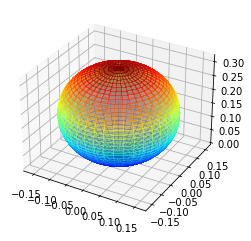


 List of parameters for LED transmitter: 
Name: Led1
Position [x y z]: [0.0000e+00 1.0000e+00 3.0000e+00] 
Normal Vector [x y z]: [0.0000e+00 0.0000e+00 -1.0000e+00] 
Lambert Number: 1.0 
Central Wavelengths [nm]: [6.2000e+02 5.3000e+02 4.7500e+02] 
FWHM [nm]: [2.0000e+01 3.0000e+01 2.0000e+01]
Luminous Flux [lm]: 1000.0
ILER [W/lm]: 
 [[3.8001e-03 0.0000e+00 0.0000e+00]
 [0.0000e+00 1.8197e-03 0.0000e+00]
 [0.0000e+00 0.0000e+00 1.1960e-02]] 
Average Power per Channel Color: 
 [1.2667e+00 6.0655e-01 3.9868e+00] 
Total Power emmited by the Transmitter [W]: 
 5.86006553538717 



In [2]:
transmitter = Transmitter(
        "Led1",
        position=[0, 1, 3],
        normal=[0, 0, -1],
        mlambert=1,
        wavelengths=[620, 530, 475],
        fwhm=[20, 30, 20],
        modulation='ieee16',
        frequency=2000,
        no_symbols=5000,
        luminous_flux=1000
    )
# transmitter.plot_spd_normalized()
# transmitter.plot_spd_at_1lm()
transmitter.plot_led_pattern()
print(transmitter)

### The surface is defined from eight imputs parametes

In [3]:
surface = Surface(
    name="surfacePlaster",
    position=[0, 4, 0],
    reflectance='plaster',
    vertex1=[-2, 0, -2],
    vertex2=[2, 0, -2],
    vertex3=[2, 0, 2],
    vertex4=[-2, 0, 2]
    )
# surface.plot_reflectance()
surface._group_vertices()
print(surface)


 List of parameters for LED transmitter: 
Name: surfacePlaster
Position [x y z]: [0.0000e+00 4.0000e+00 0.0000e+00] 
Normal Vector [x y z]: [0.0000e+00 -1.0000e+00 0.0000e+00] 
Reflectance Material: plaster 
Area: 16.0 



### The camera is defined from a set of 13 input parameters

Projecting surface onto the image plane...
Calibration matrix (K):
 [[8.9286e+02 0.0000e+00 8.2000e+02]
 [0.0000e+00 8.9286e+02 6.1600e+02]
 [0.0000e+00 0.0000e+00 1.0000e+00]]

Rotation matrix (R):
 [[1.0000e+00 -0.0000e+00 0.0000e+00]
 [-0.0000e+00 -0.0000e+00 1.0000e+00]
 [-0.0000e+00 -1.0000e+00 -0.0000e+00]]

Projection matrix (P):
 [[8.9286e+02 8.2000e+02 -0.0000e+00 -2.4600e+03]
 [-0.0000e+00 6.1600e+02 -8.9286e+02 -1.8480e+03]
 [0.0000e+00 1.0000e+00 -0.0000e+00 -3.0000e+00]]


/home/juanpc/python_phd/rs-vlc-model/./camera-models/camera_models/_frame.py:32: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection="3d")
/home/juanpc/python_phd/rs-vlc-model/./camera-models/camera_models/_principal_axis.py:27: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(proj

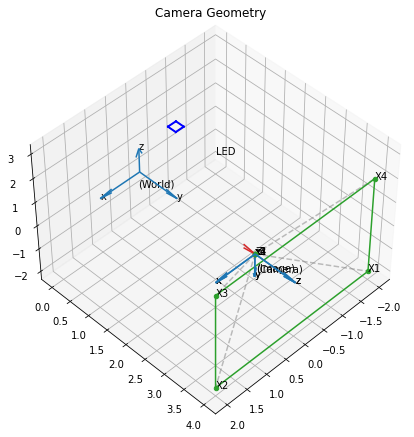

Computing the point's coordinates inside of the projected polygon ...


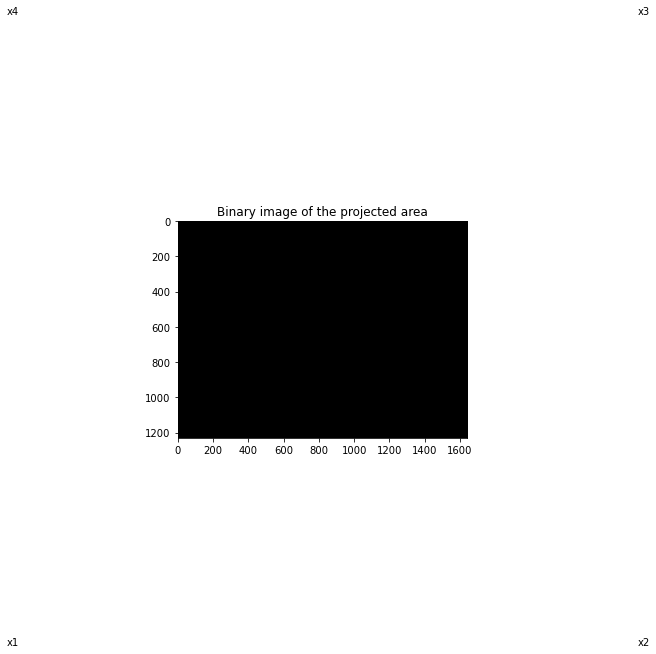

Computing the intersection points with the surface ... 
Computing the irradiance in each pixel inside of polygon...
Computing crosstalk ... 
Crosstalk matrix:
 [[2.9182e-04 8.5387e-06 2.0425e-05]
 [9.7789e-05 1.3620e-04 3.1301e-04]
 [8.7657e-06 2.8187e-05 6.1458e-04]]


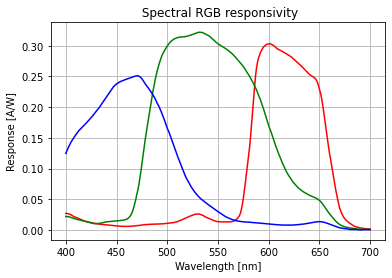

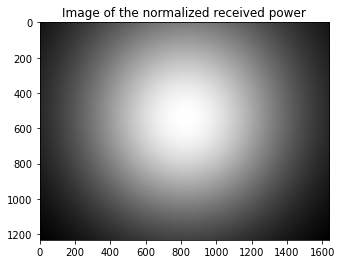

In [4]:
PIXEL_SIZE = 1.12e-6
MX = 1/PIXEL_SIZE  # number of pixels per unit distance in image coordinates in x direction
MY = 1/PIXEL_SIZE  # number of pixels per unit distance in image coordinates in y direction
FOCAL_LENGTH = 1e-3  # focal length
THETA_X = np.pi / 2.0  # roll angle
THETA_Y = np.pi  # pitch angle
THETA_Z = np.pi  # yaw angle
C = np.array([0, 3, 0])  # camera centre
IMAGE_WIDTH = 1640
IMAGE_HEIGTH = 1232
PX= IMAGE_WIDTH/(2*MX)  # principal point x-coordinate
PY= IMAGE_HEIGTH/(2*MY)  # principal point y-coordinate

camera = Camera(
    name="camera1",
    focal_length=FOCAL_LENGTH,
    pixel_size=1/MX,
    px=PX,
    py=PY,
    mx=MX,
    my=MY,
    theta_x=THETA_X,
    theta_y=THETA_Y,
    theta_z=THETA_Z,
    centre=C,
    image_height=IMAGE_HEIGTH,
    image_width=IMAGE_WIDTH,    
    surface=surface,
    transmitter=transmitter,
    sensor='SonyStarvisBSI'
    )
camera.take_picture()
camera.plot_responsivity()
camera.plot_image_intensity()



### The Rolling Shutter module is added.

Row bins:
[   0   25   51   78  104  130  157  183  210  236  263  289  316  342
  369  395  421  448  474  501  527  554  580  607  633  659  686  712
  739  765  792  818  845  871  898  924  950  977 1003 1030 1056 1083
 1109 1136 1162 1188 1215 1232]
Maximum value of Bayer image:
247.44639822535797
Current mean:
1.3920817414191088e-21
Variance of noise
2.5455387904430565e-42 1.6950662434291508e-25


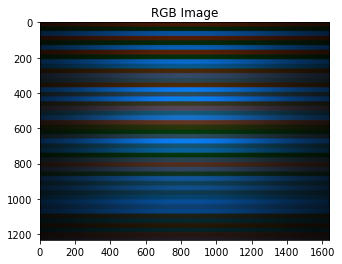

Adding blur effect ...


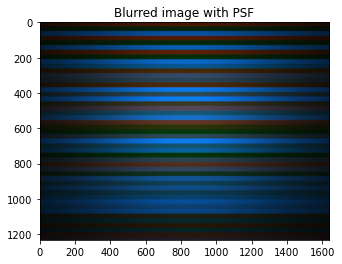

In [9]:
# Library to plot 
import matplotlib.pyplot as plt

rollingshutter = RS(
    name="rs",
    t_exposure=85e-6,
    t_rowdelay=18.904e-6,
    t_start=0,
    iso=200,
    adc_resolution=8,
    gain_pixel=3.42e26,
    temperature=298,
    idark=1e-11,
    transmitter=transmitter,
    camera=camera
)

rollingshutter.plot_color_image()
rollingshutter.add_blur(size=7, center=3.5, sigma=0.5)
rollingshutter.plot_blurred_image()




In [ ]:
# Assuming you have a large image array named 'large_image'


import numpy as np
import cv2
# Library to plot 
import matplotlib as plt

# Create a float grayscale array (values between 0.0 and 1.0)
gray_array = camera._power_image / np.max(camera._power_image)


# Scale the float values to the range 0-255 (8-bit)
gray_array_scaled = (gray_array * 255).astype(np.uint8)

plt.image.imsave('ConfigA-2m.png', gray_array_scaled, cmap='gray')

# Save the image as a PNG file
# cv2.imwrite('output.png', gray_array_scaled)

# Library to plot 
import matplotlib as plt

plt.image.imsave('ConfigA-Color-1m.png', rollingshutter._rgb_image)